In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

In [2]:
df = pd.read_csv('smsspamcollection.tsv', sep = '\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
#check null values
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [5]:
#check the number of ham and spam
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

# Balancing the data

In [6]:
ham = df[df['label'] == 'ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [7]:
spam = df[df['label'] == 'spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [8]:
#check the shape of the data
ham.shape, spam.shape

((4825, 4), (747, 4))

In [9]:
spam.shape[0] #output = no of samples in spam data

747

In [10]:
#no we have to select 747 samples from ham to balance the data

In [11]:
ham = ham.sample(spam.shape[0])

In [12]:
ham.shape

(747, 4)

In [13]:
#check the spae of data
ham.shape, spam.shape

#size of ham and spam data is same, now this is the balanced data

((747, 4), (747, 4))

In [14]:
#append spam data into ham data
data = ham.append(spam, ignore_index = True)

C:\Users\Gratitude\AppData\Local\Temp\ipykernel_14132\764467250.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam, ignore_index = True)


In [15]:
data.head()

,label,message,length,punct
0,ham,So what u doing today?,22,1
1,ham,Then. You are eldest know.,26,2
2,ham,Anything lor... U decide...,27,6
3,ham,"As I entered my cabin my PA said, '' Happy B'd...",156,13
4,ham,And now electricity just went out fml.,38,1


In [16]:
data.shape

(1494, 4)

In [17]:
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


In [18]:
data

,label,message,length,punct
0,ham,So what u doing today?,22,1
1,ham,Then. You are eldest know.,26,2
2,ham,Anything lor... U decide...,27,6
3,ham,"As I entered my cabin my PA said, '' Happy B'd...",156,13
4,ham,And now electricity just went out fml.,38,1
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


# Data Visualization

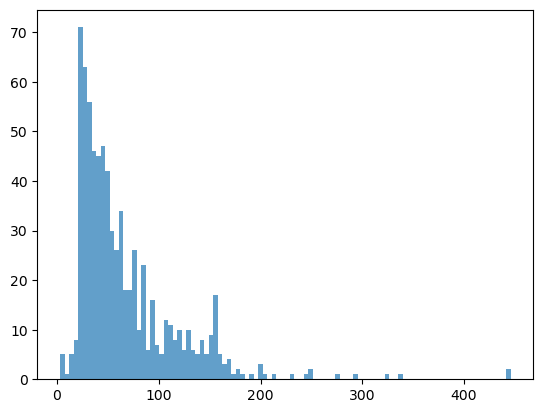

In [19]:
#plot histogram of length for ham message
plt.hist(data[data['label'] =='ham']['length'], bins = 100, alpha=0.7)
plt.show()
#from the histogram we can say that, the number of characteristics in ham message are less than 1

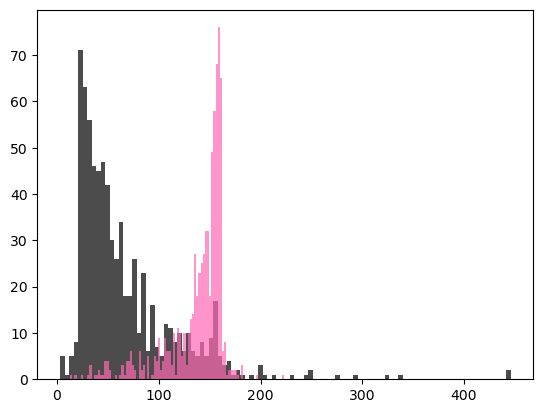

In [20]:
plt.hist(data[data['label'] =='ham']['length'], bins = 100, alpha=0.7, color = 'k')
plt.hist(data[data['label'] =='spam']['length'], bins = 100, alpha=0.7, color = 'hotpink')
plt.show()

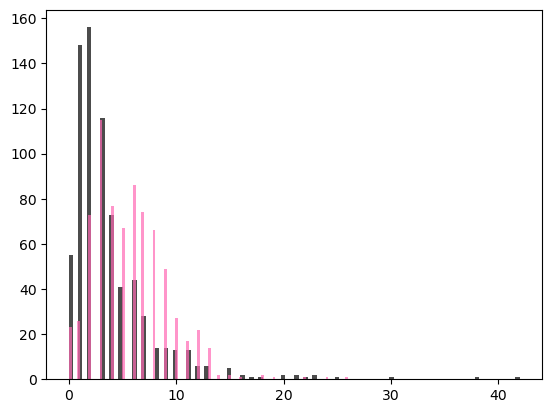

In [21]:
plt.hist(data[data['label'] =='ham']['punct'],bins = 100, alpha=0.7, color = 'k')
plt.hist(data[data['label'] =='spam']['punct'],bins = 100, alpha=0.7, color = 'hotpink')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data['message'],data['label'],test_size = 0.3,random_state= 42)

In [25]:
X_train.shape

(1045,)

In [26]:
y_train.shape

(1045,)

# Building the model

In [27]:
from sklearn.pipeline import Pipeline

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [29]:
classifier = Pipeline([('tfidf', TfidfVectorizer()),('classifier', RandomForestClassifier(n_estimators = 100))])

In [30]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

# Predicting the Result (Random Forest)

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
y_pred = classifier.predict(X_test)

In [42]:
confusion_matrix(y_test, y_pred)

array([[215,   2],
       [ 23, 209]], dtype=int64)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.95       217
        spam       0.99      0.90      0.94       232

    accuracy                           0.94       449
   macro avg       0.95      0.95      0.94       449
weighted avg       0.95      0.94      0.94       449



In [44]:
accuracy_score(y_test,y_pred)

0.9443207126948775

In [45]:
classifier.predict(['Hello, You are learning natural language Processing'])

array(['ham'], dtype=object)

In [46]:
classifier.predict(["iPhone 16 is waiting to be yours!"])

array(['ham'], dtype=object)

In [47]:
classifier.predict(['Congratulations, you won a lottery of 50 lakh'])

array(['ham'], dtype=object)